In [5]:
# 영문 텍스트 감정분석 : 감성사전을 이용해서 특정 텍스트 (paragraph) 가 어떠한 감정을 갖고 있는지 분석
# 토픽 모델링 : 글이 주어져 있을 때 주어진 글로부터 주제를 찾는 문제
# 감정 어휘사전 (AFINN(-5 ~ +5), LEXICON(긍부정), EmoLex(즐거움, 놀람...)) - 감정! 긍부정, 긍부정의 스케일 (수치화), 희노애락,

In [13]:
library(tidytext)
library(textdata)
library(tidyverse)

Warning message:
"package 'textdata' was built under R version 4.0.2"
Warning message:
"package 'tidyverse' was built under R version 4.0.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.2     √ purrr   0.3.4
√ tibble  3.0.1     √ dplyr   1.0.0
√ tidyr   1.1.0     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 4.0.2"
Warning message:
"package 'tibble' was built under R version 4.0.2"
Warning message:
"package 'tidyr' was built under R version 4.0.2"
Warning message:
"package 'readr' was built under R version 4.0.2"
Warning message:
"package 'purrr' was built under R version 4.0.2"
Warning message:
"package 'stringr' was built under R version 4.0.2"
Warning message:
"package 'forcats' was built under R version 4.0.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag(

In [27]:
# 감정어휘사전 기반의 감정분석 : 사전 등록된 단어와 단어에 따른 점수를 바탕으로 머신러닝 기법적용이 아니라 단순분석.
# 감정어휘사전에 등록된 단어가 많을수록 좋겠지

In [16]:
AFINN<-data.frame(get_sentiments("afinn"))
summary(AFINN)

     word               value        
 Length:2477        Min.   :-5.0000  
 Class :character   1st Qu.:-2.0000  
 Mode  :character   Median :-2.0000  
                    Mean   :-0.5894  
                    3rd Qu.: 2.0000  
                    Max.   : 5.0000  

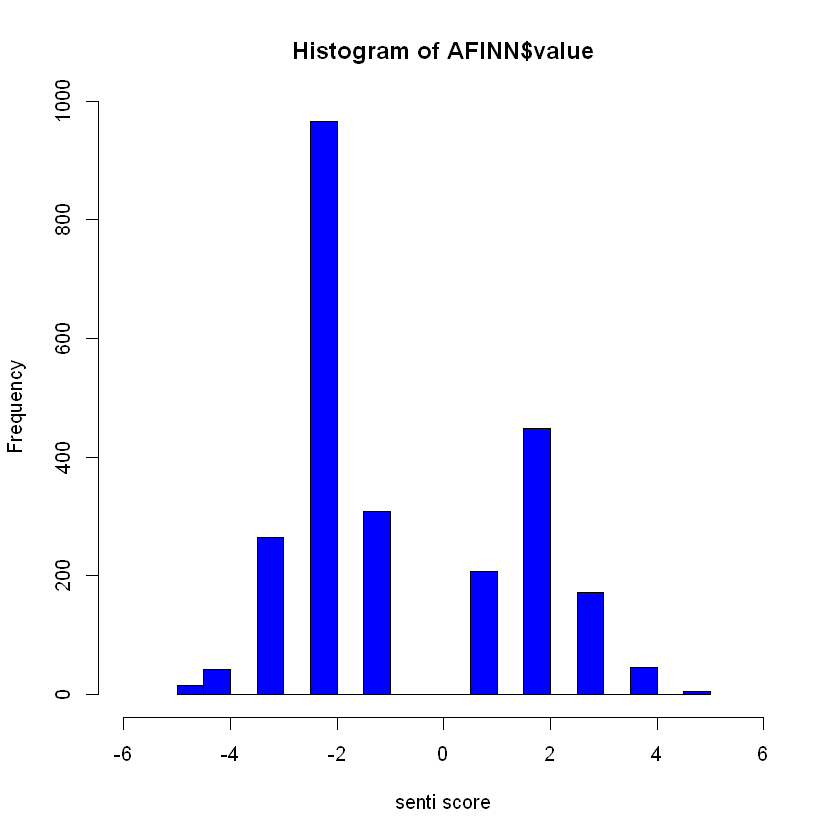

In [19]:
hist(AFINN$value, breaks=20, xlim=c(-6, 6), col='blue', xlab="senti score")

In [26]:
oplex<-data.frame(get_sentiments("bing"))
table(oplex$sentiment)


negative positive 
    4781     2005 

In [31]:
emolex<- data.frame(get_sentiments("nrc"))
head(table(emolex))

             sentiment
word          anger anticipation disgust fear joy negative positive sadness
  abacus          0            0       0    0   0        0        0       0
  abandon         0            0       0    1   0        1        0       1
  abandoned       1            0       0    1   0        1        0       1
  abandonment     1            0       0    1   0        1        0       1
  abba            0            0       0    0   0        0        1       0
  abbot           0            0       0    0   0        0        0       0
             sentiment
word          surprise trust
  abacus             0     1
  abandon            0     0
  abandoned          0     0
  abandonment        1     0
  abba               0     0
  abbot              0     1

In [32]:
library(tm)
library(stringr)
library(dplyr)

Warning message:
"package 'tm' was built under R version 4.0.2"
Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate




In [35]:
my.text.location<-"papers"
mypaper<-VCorpus(DirSource(my.text.location))
mypaper

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 33

In [37]:
mypaper[[1]][1] # 코퍼스 내의 내용 확인 

$content
[1] "Does deliberative setting, online versus face-to-face, influence citizens' experiences? Are certain factors differently influential in one setting than in the other? We draw on a nationally representative survey and identify citizens who participated in both online and face-to-face settings (n = 82). We use structural equation modeling to first assess the effects that deliberation format has on the interrelationship between such crucial factors as motivations to deliberate, perceived diversity, elicited emotions, enhanced understanding, and goal evaluation. We later employ network analysis to ask which factor or which cluster of factors is more central to an overall experience in which format. Relying on citizens who participated in both settings and using within-subject analyses, we assure that the previously unnoted findings are attributable to the format per se rather than to individual characteristics. We discuss the theoretical, practical and methodological implications."

In [41]:
mytext<-c(rep(NA,33))
for (i in 1:33){
    #mytext[i]<-mypaper[[i]][1]
    mytext[i] <- as.character(mypaper[[i]][1])
}
mytext

[1] "Does deliberative setting, online versus face-to-face, influence citizens' experiences? Are certain factors differently influential in one setting than in the other? We draw on a nationally representative survey and identify citizens who participated in both online and face-to-face settings (n = 82). We use structural equation modeling to first assess the effects that deliberation format has on the interrelationship between such crucial factors as motivations to deliberate, perceived diversity, elicited emotions, enhanced understanding, and goal evaluation. We later employ network analysis to ask which factor or which cluster of factors is more central to an overall experience in which format. Relying on citizens who participated in both settings and using within-subject analyses, we assure that the previously unnoted findings are attributable to the format per se rather than to individual characteristics. We discuss the theoretical, practical and methodological implications."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
 [2] "The debate on late night comedy has been inconclusive, with some scholars arguing that this genre increases political knowledge, and others seeing late night comedy as harmful to effective citizenry. We add to the debate and to the research on media effects more generally, by proposing a model that measures political knowledge. The model utilizes item response theory (IRT) to account for individual characteristics, knowledge item difficulty, and response format that influences the likelihood of providing a correct response. Drawing on the 2004 National Annenberg Election Study, we employ this model to test knowledge gain from late night comedy. Using a meta-analysis across 35 political knowledge items, we show that late night comedy increases knowledge, but primarily on easy political items that have fewer correct response options, and mainly among the inattentive citizens. We discuss theoretical implications and provide practical suggestions for scholarship on media effects."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
 [3] "We draw on a nationally representative sample of American adults who reported having participated in face-to-face deliberation (N = 756). We use stru

In [50]:
my.df.text<-data_frame(paper.id = 1:33, doc=mytext)
my.df.text.word <- my.df.text %>% unnest_tokens(word, doc)

In [52]:
my.df.text.word %>% inner_join(get_sentiments("bing")) %>% count(word, paper.id, sentiment)

Joining, by = "word"



word,paper.id,sentiment,n
<chr>,<int>,<chr>,<int>
achievements,10,positive,1
advanced,11,positive,1
advanced,25,positive,1
affirmative,9,positive,1
ambivalence,4,negative,7
ambivalence,6,negative,2
ambivalence,32,negative,6
ambivalent,16,negative,1
anger,21,negative,3


In [53]:
library(tidyr)

In [55]:
myresult.sa <- my.df.text.word %>% 
    inner_join(get_sentiments("bing")) %>% 
    count(word, paper.id, sentiment) %>% 
    spread(sentiment, n, fill=0)

Joining, by = "word"



In [62]:
# 문서별 감정분석 (긍정, 부정)
myagg<- summarise(group_by(myresult.sa, paper.id), 
                  pos.sum = sum(positive), 
                  neg.sum = sum(negative), 
                  pos.sent = pos.sum-neg.sum)
myagg

`summarise()` ungrouping output (override with `.groups` argument)



paper.id,pos.sum,neg.sum,pos.sent
<int>,<dbl>,<dbl>,<dbl>
1,3,0,3
2,5,3,2
3,3,2,1
4,6,16,-10
5,1,3,-2
6,1,6,-5
7,7,2,5
8,2,3,-1
9,7,11,-4


In [ ]:
# 객체(오브젝트) %>% 메서드(함수) : 파이프 오퍼레이터
# 함수를 오브젝트에 적용하십시오!

In [43]:
text <- c("How Are You", "He is a boy", "She is a girl") # 요소3개 벡터
text

[1] "How Are You"   "He is a boy"   "She is a girl"

In [48]:
textof <- data_frame(line=1:3, text = text)

textof %>% unnest_tokens(word, text)

line,word
<int>,<chr>
1,how
1,are
1,you
2,he
2,is
2,a
2,boy
3,she
3,is


In [65]:
install.packages("textstem")

Installing package into 'C:/Users/kccistc/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'coda', 'zoo', 'dtt', 'extrafontdb', 'Rttf2pt1', 'statnet.common', 'sylly.en', 'sylly', 'syuzhet', 'extrafont', 'fastmatch', 'ggrepel', 'network', 'RcppParallel', 'sna', 'proxyC', 'RcppArmadillo', 'english', 'mgsub', 'qdapRegex', 'koRpus.lang.en', 'koRpus', 'lexicon', 'quanteda', 'textclean', 'textshape'




package 'coda' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'dtt' successfully unpacked and MD5 sums checked
package 'extrafontdb' successfully unpacked and MD5 sums checked
package 'Rttf2pt1' successfully unpacked and MD5 sums checked
package 'statnet.common' successfully unpacked and MD5 sums checked
package 'sylly.en' successfully unpacked and MD5 sums checked
package 'sylly' successfully unpacked and MD5 sums checked
package 'syuzhet' successfully unpacked and MD5 sums checked
package 'extrafont' successfully unpacked and MD5 sums checked
package 'fastmatch' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked
package 'network' successfully unpacked and MD5 sums checked
package 'RcppParallel' successfully unpacked and MD5 sums checked
package 'sna' successfully unpacked and MD5 sums checked
package 'proxyC' successfully unpacked and MD5 sums checked
package 'RcppArmadil

In [66]:
library(textstem)

Warning message:
"package 'textstem' was built under R version 4.0.2"
Loading required package: koRpus.lang.en

Warning message:
"package 'koRpus.lang.en' was built under R version 4.0.2"
Loading required package: koRpus

Warning message:
"package 'koRpus' was built under R version 4.0.2"
Loading required package: sylly

Warning message:
"package 'sylly' was built under R version 4.0.2"
For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()



Attaching package: 'koRpus'


The following object is masked from 'package:readr':

    tokenize




In [67]:
x <- c("well","doggies","running")
lemmatize_words(x) # 단어 원형 변환 lemmatizing 

[1] "good"  "doggy" "run"